In [1]:
import Metro
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams['font.sans-serif'] = ['simHei'] 
plt.rcParams['axes.unicode_minus'] = False  

# 数据处理

In [3]:
path = 'data/Metro_train/'
fileList = os.listdir(path) 

In [4]:
linesDay = pd.DataFrame()
linesDay = Metro.genLinesSeries(path,fileList,'hour')

------------开始计算: record_2019-01-01.csv ----------------
------------开始计算: record_2019-01-02.csv ----------------
------------开始计算: record_2019-01-03.csv ----------------
------------开始计算: record_2019-01-04.csv ----------------
------------开始计算: record_2019-01-05.csv ----------------
------------开始计算: record_2019-01-06.csv ----------------
------------开始计算: record_2019-01-07.csv ----------------
------------开始计算: record_2019-01-08.csv ----------------
------------开始计算: record_2019-01-09.csv ----------------
------------开始计算: record_2019-01-10.csv ----------------
------------开始计算: record_2019-01-11.csv ----------------
------------开始计算: record_2019-01-12.csv ----------------
------------开始计算: record_2019-01-13.csv ----------------
------------开始计算: record_2019-01-14.csv ----------------
------------开始计算: record_2019-01-15.csv ----------------
------------开始计算: record_2019-01-16.csv ----------------
------------开始计算: record_2019-01-17.csv ----------------
------------开始计算: record_2019-0

In [5]:
linesDay.shape

(1789, 8)

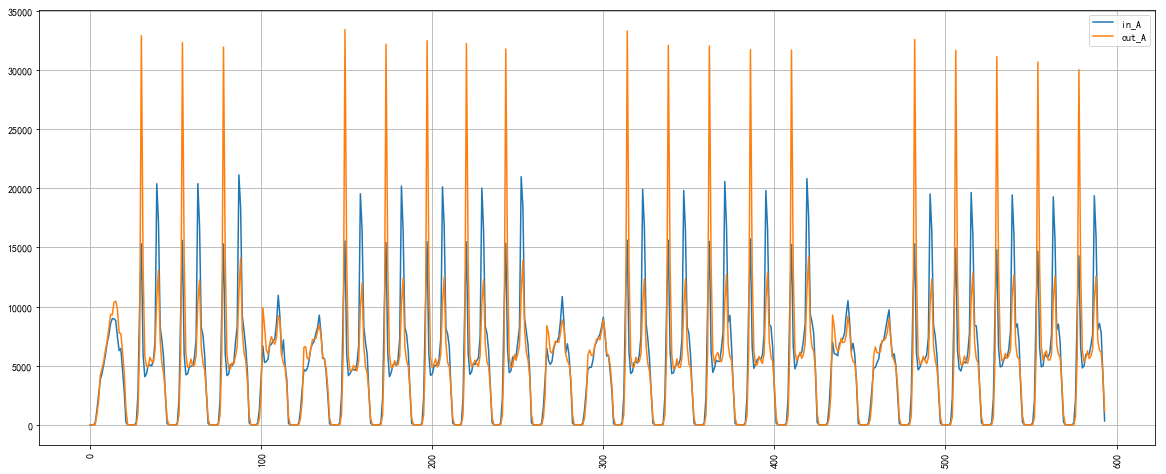

In [56]:
plt.figure(figsize=(20,8))
data = linesDay[linesDay['lineID']=='A']
data.reset_index(drop=True,inplace=True)
plt.plot(data['inCount'],label='in_A')
plt.plot(data['outCount'],label='out_A')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

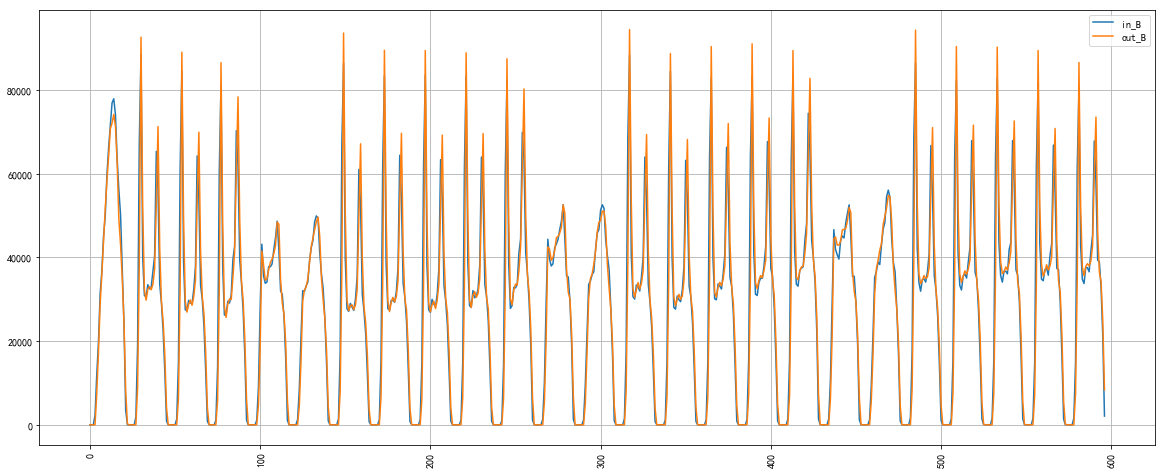

In [55]:
plt.figure(figsize=(20,8))
data = linesDay[linesDay['lineID']=='B']
data.reset_index(drop=True,inplace=True)
plt.plot(data['inCount'],label='in_B')
plt.plot(data['outCount'],label='out_B')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

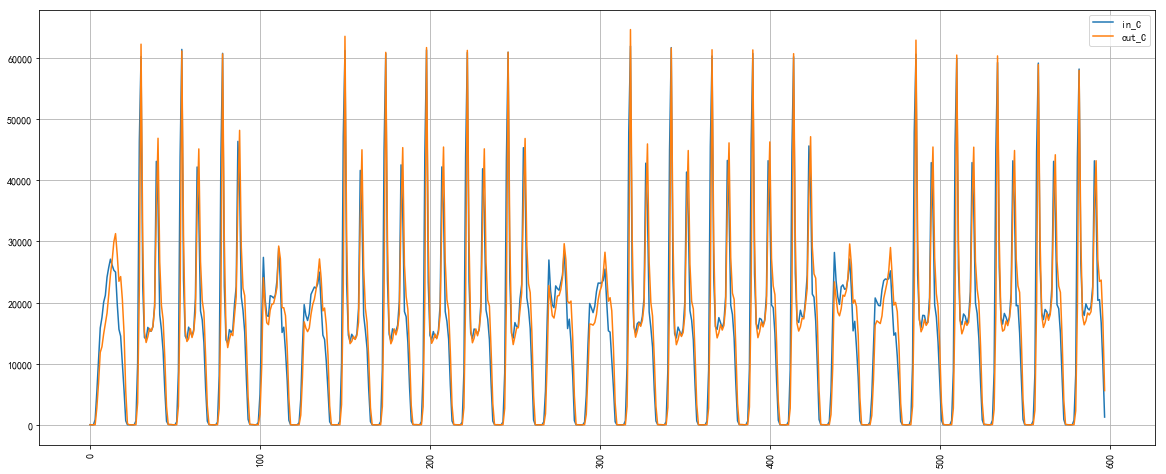

In [57]:
plt.figure(figsize=(20,8))
data = linesDay[linesDay['lineID']=='C']
data.reset_index(drop=True,inplace=True)
plt.plot(data['inCount'],label='in_C')
plt.plot(data['outCount'],label='out_C')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# ARIMA模型

In [6]:
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA #建立ARIMA(p,1,q)模型
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验

D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
line = linesDay[(linesDay['lineID']=='C')]
line.reset_index(drop=True,inplace=True)
ts = line['inCount']

In [24]:
ts

0         40
1          9
2         29
3        844
4       5437
5      10763
6      15850
7      17544
8      20059
9      21187
10     24168
11     25766
12     27101
13     26116
14     25289
15     24989
16     19800
17     15636
18     14511
19     10024
20      5661
21       675
22        31
23        34
24        16
25         5
26        36
27       653
28     10057
29     46378
       ...  
568    34112
569    19660
570    19013
571    15028
572     7664
573      884
574       28
575       50
576       16
577        6
578       38
579      767
580     8157
581    43678
582    58183
583    26420
584    18803
585    17895
586    19794
587    19059
588    18796
589    19381
590    22626
591    43181
592    35199
593    20368
594    20489
595    16705
596     9756
597     1278
Name: inCount, Length: 598, dtype: int64

## 数据相关性

### 自相关图

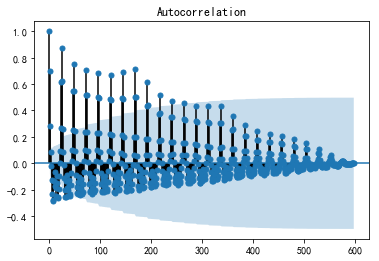

In [26]:
## 自相关图
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(ts)


## ADF 平稳性检验

In [ ]:
## 另一种平稳性检验
def test_stationarity(timeseries):
    dftest = ADF(timeseries, autolag='AIC')
    return dftest[1]
    #此函数返回的是p值

In [8]:
## 平稳性检验

diff=0
adf = ADF(line['inCount'])
if adf[1]>0.05:
    print (u'原始序列经检验不平稳，p值为:%s'%(adf[1]))
else:
    print (u'原始序列经检验平稳，p值为:%s'%(adf[1]))
while adf[1]>=0.05:#adf[1]为p值，p值小于0.05认为是平稳的
    print(diff)
    diff=diff+1
    adf=ADF(line['inCount'].diff(diff).dropna())
print (u'原始序列经过%s阶差分后归于平稳，p值为%s'%(diff,adf[1]))

原始序列经检验平稳，p值为:1.37204826858e-26
原始序列经过0阶差分后归于平稳，p值为1.37204826858e-26


In [28]:
temp = np.array(ts)
t = ADF(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output
# --------------------- 
# 作者：积微成著 
# 来源：CSDN 
# 原文：https://blog.csdn.net/duxu24/article/details/52079901 
# 版权声明：本文为博主原创文章，转载请附上博文链接！

,value
Test Statistic Value,-14.2715
p-value,1.37205e-26
Lags Used,19
Number of Observations Used,578
Critical Value(1%),-3.44171
Critical Value(5%),-2.86655
Critical Value(10%),-2.56944


In [ ]:
def best_diff(df, maxdiff = 8):
    p_set = {}
    for i in range(0, maxdiff):
        temp = df.copy() #每次循环前，重置
        if i == 0:
            temp['diff'] = temp[temp.columns[1]]
        else:
            temp['diff'] = temp[temp.columns[1]].diff(i)
            temp = temp.drop(temp.iloc[:i].index) #差分后，前几行的数据会变成nan，所以删掉
        pvalue = test_stationarity(temp['diff'])
        p_set[i] = pvalue
        p_df = pd.DataFrame.from_dict(p_set, orient="index")
        p_df.columns = ['p_value']
    i = 0
    while i < len(p_df):
        if p_df['p_value'][i]<0.01:
            bestdiff = i
            break
        i += 1
    return bestdiff  

## 白噪声检验

In [18]:
lb, p_l= acorr_ljungbox(line['inCount'], lags = 12)
h = (p_l < 0.05).sum() #p值小于0.05，认为是非白噪声。
if h > 0:
    print (u'模型ARIMA(%s,1,%s)不符合白噪声检验'%(p,q))
else:
    print (u'模型ARIMA(%s,1,%s)符合白噪声检验' %(p,q))

模型ARIMA(59,1,59)不符合白噪声检验


In [30]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print( u'序列的纯随机性检测结果为：',acorr_ljungbox(ts,lags = 1))

序列的纯随机性检测结果为： (array([ 296.75944113]), array([  1.67414316e-66]))


## 构建ARMA模型

## ACF、PACF 判断模型阶次

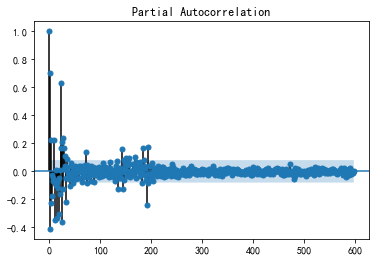

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(ts)
plot_pacf(ts)

### 方法二：信息准则定阶 

In [54]:
tep = np.array(range(10))

In [63]:
res = sm.tsa.arma_order_select_ic(ts.values, ic=['aic', 'bic','hqic'], trend='nc', max_ar=8, max_ma=8)
print('AIC', res.aic_min_order)
print('BIC', res.bic_min_order)
print('HQIC', res.hqic_min_order)

D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to conver

AIC (6, 8)
BIC (6, 8)
HQIC (6, 8)


D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [61]:
import statsmodels.api as sm
# temp = np.array(ts)
sm.tsa.arma_order_select_ic(tep,max_ar=6,max_ma=4,ic='aic',trend='nc')['aic_min_order']  # AIC

D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: invalid value encountered in true_divide
  R_mat, T_mat)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp

(2, 2)

In [62]:
sm.tsa.arma_order_select_ic(ts.values,max_ar=6,max_ma=4,ic='bic', trend='nc')['bic_min_order']  # BIC

D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\programfiles\anaconda35.0.1\lib\site-packages\statsmodels\tsa\tsatools.py:586: Runti

(6, 4)

In [44]:
sm.tsa.arma_order_select_ic(ts.values,max_ar=6,max_ma=4,ic='hqic')['hqic_min_order'] # HQIC

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
#模型识别
#确定最佳p,d,q值
xdata = line['inCount']

#定阶
pmax = int(len(xdata)/10) #一般阶数不超过length/10
qmax = int(len(xdata)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: #存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(xdata, (p,1,q).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().astype('float64').idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print (u'BIC最小的p值和q值为：%s、%s' %(p,q))

ValueError: attempt to get argmin of an empty sequence

## 模型拟合

In [83]:
line.head()

,time,lineID,outCount,outDevices,outUsers,inCount,inDevices,inUsers
0,2019-01-01 02:00,C,17,14,13,40,22,35
1,2019-01-01 03:00,C,27,20,25,9,7,9
2,2019-01-01 04:00,C,28,25,26,29,22,27
3,2019-01-01 05:00,C,20,18,20,844,116,840
4,2019-01-01 06:00,C,2817,328,2807,5437,211,5414


In [82]:
# line['time'] = line['time'].apply(lambda x : x+':00')
# line.set_index('time')
line.index = pd.DatetimeIndex(line.index)
ts2 = line['inCount']
# line.head()

TypeError: cannot convert Int64Index->DatetimeIndex

In [112]:
line.index=(line.index*3600000000000+1546272000000000000).to_datetime()

D:\programfiles\anaconda35.0.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


In [115]:
line['inCount'] = line['inCount'].astype(np.float64)
ts2 = line['inCount']

D:\programfiles\anaconda35.0.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
#模型检验：模型确立后，检验其残差序列是否为白噪声
lagnum=12#残差延迟个数

p = 3
q = 2
order = (p,2,q)
train = ts2[:-10]
test = ts2[-10:]
tempModel = sm.tsa.ARIMA(train,order).fit()

# arima = ARIMA(xdata, (p, 1, q)).fit() #建立并训练模型
# xdata_pred = arima.predict(typ = 'levels') #预测
# pred_error = (xdata_pred - xdata).dropna() #计算残差





## 模型预测

In [122]:
#模型预测
test_predict = tempModel.forecast(10)
print (test_predict)

(array([ 14201.26508323,  16186.82259123,  16422.53418886,  16873.81093102,
        16085.42273244,  16231.16748073,  16161.49318608,  16261.02961692,
        16118.93046499,  16101.78604029]), array([  9493.43961547,  16427.85064467,  18927.571988  ,  20671.2625478 ,
        22489.32453998,  24507.34822592,  26262.37575224,  27847.68673738,
        29333.58890459,  30786.55174719]), array([[ -4405.53465249,  32808.06481895],
       [-16011.17301572,  48384.81819818],
       [-20674.82522242,  53519.89360013],
       [-23641.11917764,  57388.74103967],
       [-27992.84340255,  60163.68886742],
       [-31802.35239867,  64264.68736012],
       [-35311.81743677,  67634.80380892],
       [-38319.43344109,  70841.49267494],
       [-41373.84732531,  73611.70825528],
       [-44238.74659237,  76442.31867296]]))


## 预测对比

In [124]:
delta = tempModel.fittedvalues - train
score = 1 - delta.var()/train.var()
print(score) 

-1.1770589294353102


In [ ]:
# https://blog.csdn.net/duxu24/article/details/52079901
# https://blog.csdn.net/u011596455/article/details/78650458